<a href="https://colab.research.google.com/github/MNagaHarshithRao/AppleStockPricePrediction/blob/main/AppleStockPricePredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df1=pd.read_csv('AAPL.csv')
df1.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
print(df1.isnull().sum())

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


In [ ]:
df1 = df1.reset_index()['close']

In [ ]:
df1.shape

(1258,)

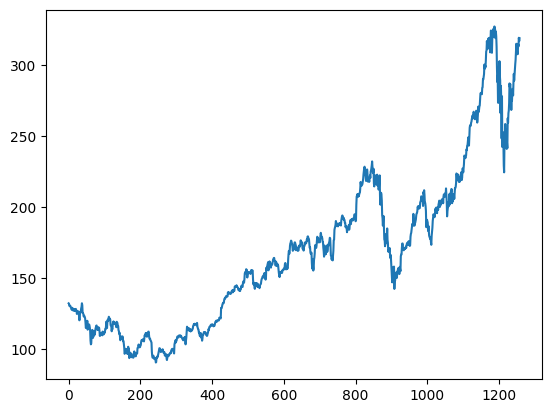

In [ ]:
plt.plot(df1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1258, 1)

In [ ]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [ ]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
 training_size, test_size

(817, 441)

In [ ]:

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)


In [ ]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
print(X_train.shape), print(y_train.shape)

(717, 100, 1)
(717, 1)


(None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - loss: 0.0239 - val_loss: 0.0526
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 9.5740e-04 - val_loss: 0.0082
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 8.7445e-04 - val_loss: 0.0038
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - loss: 5.7463e-04 - val_loss: 0.0041
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - loss: 6.2664e-04 - val_loss: 0.0043
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 6.1514e-04 - val_loss: 0.0035
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 5.6508e-04 - val_loss: 0.0035
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 5.8821e-04 - val_loss: 0.0036
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 6.0336e-04 - val_loss: 0.0033
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - loss: 5.3915e-04 - val_loss: 0.0033
Epoch

In [ ]:
import tensorflow as tf

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

142.3511264705528

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

237.95416163294527

In [ ]:
print("Shape of test_predict:", test_predict.shape)  # Expected (341, 1)
print("Expected shape of testPredictPlot slice:", testPredictPlot[test_start:test_end, :].shape)  # Expected (340,1)


Shape of test_predict: (341, 1)
Expected shape of testPredictPlot slice: (340, 1)


In [ ]:
test_end = min(test_start + len(test_predict), len(testPredictPlot))  # Prevents overshooting
testPredictPlot[test_start:test_end, :] = test_predict[:test_end - test_start, :]  # Trim test_predict if needed


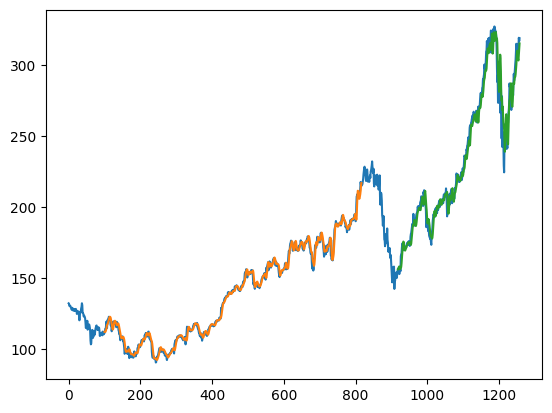

In [ ]:
import numpy as np  # Ensure NumPy is imported

look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# ✅ Ensure testPredictPlot has the correct shape
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan

# ✅ Dynamically adjust the slicing to match test_predict shape
test_start = len(train_predict) + (look_back * 2) + 1
test_end = min(test_start + len(test_predict), len(testPredictPlot))  # Fix mismatch

testPredictPlot[test_start:test_end, :] = test_predict[:test_end - test_start, :]  # Slice test_predict properly

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
len(test_data)

441

In [ ]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [ ]:
from numpy import array
lst_output = []
n_steps = 100
i = 0
while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i = i+1
print(lst_output)

[[0.9519514441490173], [0.9437417984008789], [0.9330829381942749], [0.9232513904571533], [0.9157961010932922], [0.9112129211425781], [0.9093376994132996], [0.9095560908317566], [0.911003053188324], [0.9127819538116455], [0.9141525030136108], [0.9146538376808167], [0.9141449928283691], [0.9127719402313232], [0.9108774065971375], [0.9088910818099976], [0.9072177410125732], [0.9061567187309265], [0.9058582186698914], [0.9063180685043335], [0.9074073433876038], [0.9089202284812927], [0.9106284976005554], [0.9123288989067078], [0.9138782024383545], [0.9152094125747681], [0.9163254499435425], [0.9172859787940979], [0.918178141117096], [0.9190928339958191]]


In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
len(df1)

1258

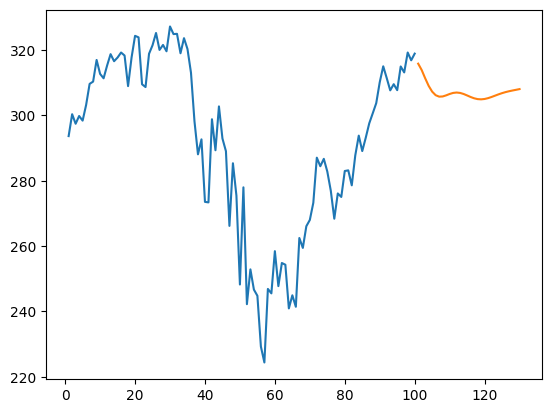

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

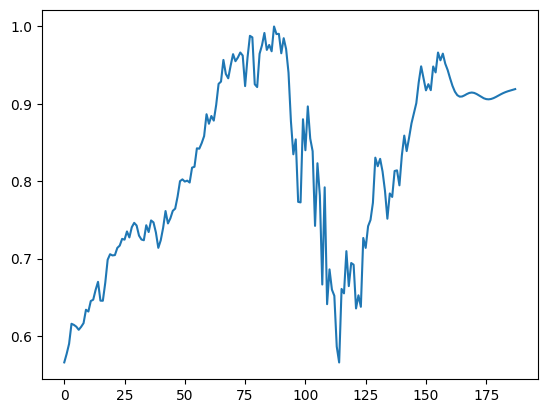

In [ ]:
df3 = df.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])